<a href="https://colab.research.google.com/github/Vinicius-S-Grilo/Portfolio/blob/main/MVP_Sprint_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP Spint I**

Vinicius Simas Grilo

Tema: Análise, pré-processamento e visualização de dados

## **Definição do problema**

O dataset escolhido é o do link https://www.kaggle.com/datasets/mittvin/anime-dataset?select=Anime_list.csv. Trata-se de um arquivo contendo uma lista de animes de uma plataforma de ranking e 5 atributos:

- **Anime_name**: nome do anime.
- **episode**: número e tipo de episódio.
- **duration**: duração de tempo entre o lançamento e o encerramento do anime.
- **members**: quantos membros assistiram o anime.
- **score**: a prontuação designada ao anime.



## **Objetivo**

O objetivo deste trabalho será explorar o dataset, obter algumas estatísticas e tentar extrair o máximo de informação dos atributos. Ainda, executar transformações no mesmo afim de gerar visualizações mais ricas e informativas.

In [ ]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime



# **Análise inicial dos dados**

In [ ]:
#Primeiro vamos carregar o arquivo csv para o collab
id = '1GKTan6AiGx79yUGFG968xLPztJwcYmBT'
url = f"https://drive.google.com/uc?id={id}"
gdown.download(url)


Downloading...
From: https://drive.google.com/uc?id=1GKTan6AiGx79yUGFG968xLPztJwcYmBT
To: /content/Anime_list.csv
100%|██████████| 1.25M/1.25M [00:00<00:00, 105MB/s]


'Anime_list.csv'

In [ ]:
#Em seguida, passar o arquivo csv para um pandas dataframe
anime_dataset = pd.read_csv(r"/content/Anime_list.csv")

In [ ]:
#verificando as primeiras 10 linhas e ultimas 10 linhas para verificar se o dataset foi
#corretamente importado
anime_dataset.head(10)

,Anime_name,episode,duration,members,Score
0,Fullmetal Alchemist: Brotherhood,TV (64 eps),Apr 2009 - Jul 2010,"3,263,142 members",9.09
1,Steins;Gate,TV (24 eps),Apr 2011 - Sep 2011,"2,505,884 members",9.07
2,Gintama°,TV (51 eps),Apr 2015 - Mar 2016,"614,907 members",9.06
3,Shingeki no Kyojin Season 3 Part 2,TV (10 eps),Apr 2019 - Jul 2019,"2,195,508 members",9.05
4,Bleach: Sennen Kessen-hen,TV (13 eps),Oct 2022 - Dec 2022,"501,080 members",9.04
5,Gintama: The Final,Movie (1 eps),Jan 2021 - Jan 2021,"142,386 members",9.04
6,Hunter x Hunter (2011),TV (148 eps),Oct 2011 - Sep 2014,"2,746,452 members",9.04
7,Gintama',TV (51 eps),Apr 2011 - Mar 2012,"542,758 members",9.03
8,Gintama': Enchousen,TV (13 eps),Oct 2012 - Mar 2013,"318,160 members",9.03
9,Kaguya-sama wa Kokurasetai: Ultra Romantic,TV (13 eps),Apr 2022 - Jun 2022,"878,589 members",9.03


In [ ]:
anime_dataset.tail(10)

,Anime_name,episode,duration,members,Score
14840,Yahari Ore no Seishun Love Comedy wa Machigatt...,TV (13 eps),Apr 2015 - Jun 2015,"1,041,135 members",8.21
14841,Kuroko no Basket 2nd Season,TV (25 eps),Oct 2013 - Mar 2014,"839,560 members",8.21
14842,Magi: The Kingdom of Magic,TV (25 eps),Oct 2013 - Mar 2014,"829,387 members",8.21
14843,Mahou Shoujo Madoka★Magica Movie 1: Hajimari n...,Movie (1 eps),Oct 2012 - Oct 2012,"196,606 members",8.21
14844,Major S1,TV (26 eps),Nov 2004 - May 2005,"100,001 members",8.21
14845,Meitantei Conan Movie 13: Shikkoku no Chaser,Movie (1 eps),Apr 2009 - Apr 2009,"58,615 members",8.21
14846,One Piece Movie 14: Stampede,Movie (1 eps),Aug 2019 - Aug 2019,"182,431 members",8.21
14847,Shoujo Kakumei Utena,TV (39 eps),Apr 1997 - Dec 1997,"214,440 members",8.21
14848,Shoujo Shuumatsu Ryokou,TV (12 eps),Oct 2017 - Dec 2017,"333,432 members",8.21
14849,Bungou Stray Dogs 3rd Season,TV (12 eps),Apr 2019 - Jun 2019,"612,395 members",8.21


Tudo indica que o dataset foi corretamente carregado em um dataframe.

In [ ]:
#Verificando o número de linhas e colunas do dataset
anime_dataset.shape

(14850, 5)

In [ ]:
anime_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Anime_name  14850 non-null  object 
 1   episode     14850 non-null  object 
 2   duration    14850 non-null  object 
 3   members     14850 non-null  object 
 4   Score       14850 non-null  float64
dtypes: float64(1), object(4)
memory usage: 580.2+ KB


Com a execução da célula anterior, é possível perceber que apenas um atributo possui o tipo esperado, o Score como float. Ainda, verifica-se que não existem valores nulos para nenhum atributo. Isso pode ser confirmado a seguir:

In [ ]:
#aqui verifica-se que a somas de valores nulos é igual a zero, ou seja,
#não há valores nulos
anime_dataset.isnull().sum()

Anime_name    0
episode       0
duration      0
members       0
Score         0
dtype: int64

Além disso, nota-se que outros atributos podem ser melhor explorados e a informação neles contidas pode ser melhor descrita de outra forma, por exemplo a coluna members, a palavra members pode ser removida das variáveis, ficando apenas com o valor numérico.


A disposição dos dados tal como está atrapalha um pouco a obtenção de algumas estatísticas como podemos ver a seguir

In [ ]:
#dessa forma, apenas as estatísticas das colunas numéricas são extraídas
anime_dataset.describe()

,Score
count,14850.000000
mean,8.448015
std,0.173173
min,8.210000
25%,8.300000
50%,8.410000
75%,8.570000
max,9.090000


In [ ]:
#poderíamos selecionar apenas as colunas não numéricas para observarmos
#outro tipo de estatística utilizando o mesmo método que o anterior

anime_dataset[['Anime_name', 'episode', 'duration', 'members']].describe()

,Anime_name,episode,duration,members
count,14850,14850,14850,14850
unique,346,67,267,379
top,Hunter x Hunter,Movie (1 eps),Jul 2023 - Sep 2023,"407,573 members"
freq,50,3263,232,50


In [ ]:
#adicionando o parâmetro include ='all' fornece estatísticas também para colunas não numéricas
#tal como count, top, unique, e outras.

anime_dataset.describe(include='all')

,Anime_name,episode,duration,members,Score
count,14850,14850,14850,14850,14850.000000
unique,346,67,267,379,NaN
top,Hunter x Hunter,Movie (1 eps),Jul 2023 - Sep 2023,"407,573 members",NaN
freq,50,3263,232,50,NaN
mean,NaN,NaN,NaN,NaN,8.448015
std,NaN,NaN,NaN,NaN,0.173173
min,NaN,NaN,NaN,NaN,8.210000
25%,NaN,NaN,NaN,NaN,8.300000
50%,NaN,NaN,NaN,NaN,8.410000
75%,NaN,NaN,NaN,NaN,8.570000


Podemos notar que as estatísticas obtidas através do método describe com o dataset da forma como está não é muito informativa. Também abaixo, uma tentativa de plotar pairplots para termos uma visão geral gráfica desses dados.

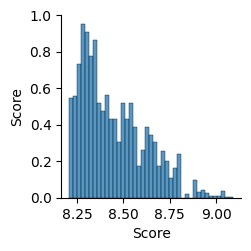

In [ ]:
sns.pairplot(anime_dataset)
plt.show()

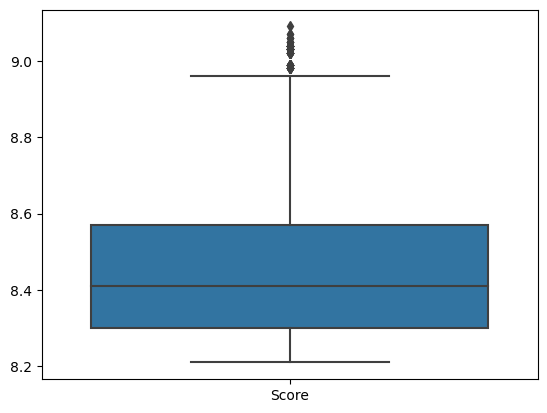

In [ ]:
sns.boxplot(data=anime_dataset)
plt.show()

Porém conforme esperado, apenas a coluna interpretada como float, ou seja, Score, é plotada.

Ao tentar se extrair uma informação básica que é plotar um histograma das categorias de animes para saber como está a distribuição dos dados por tipo de anime, não fica claro ou muito menos visualmente compreensível:




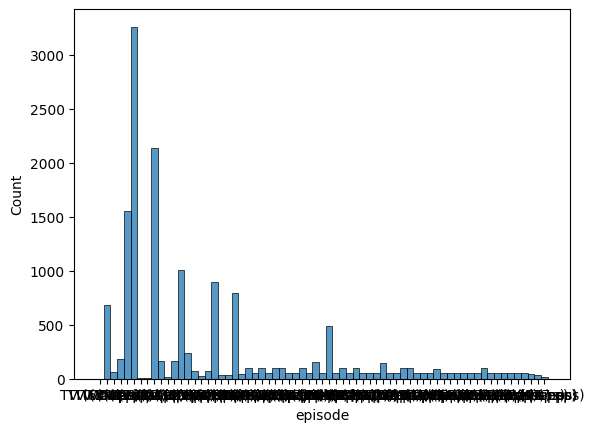

In [ ]:
sns.histplot(anime_dataset['episode'])
plt.show()

# **Pré-processamento dos dados**

A seguir, serão feitas uma série de modificações no dataset para que possamos extrair estatísticas com mais valor e tentarmos obter insights mais razoáveis. Como tentar relacionar o tipo de anime e o número de episódios com a pontuação do mesmo.

A primeira modificação a ser feita será no atributo episode. Primeiro vamos renomear a coluna para "Media_Category" pois além do número de episódios totais, esse atributo também nos traz informação a cerca da categoria de anime, se é um filme, um especial ou para exibição em TV por exemplo.

In [ ]:
#renomeando
anime_dataset = anime_dataset.rename({'episode':'Media_Category'},axis=1)

In [ ]:
#limpando os caracteres especiais dos valores
anime_dataset['Media_Category'] = anime_dataset['Media_Category'].apply(lambda x: x.replace('(',''))
anime_dataset['Media_Category'] = anime_dataset['Media_Category'].apply(lambda x: x.replace(')',''))

#Criação do atributo "Number_Episodes", referente à quantidade de episódios de cada anime
anime_dataset['Number_Episodes'] = anime_dataset['Media_Category'].apply(lambda x: x.split(' ')[1])
anime_dataset['Media_Category'] = anime_dataset['Media_Category'].apply(lambda x: x.split(' ')[0])

In [ ]:
anime_dataset['Media_Category'].value_counts()

TV         9444
Movie      3463
Special     652
ONA         648
OVA         643
Name: Media_Category, dtype: int64

Com essa informação jé é possível verificar que possuímos  5 tipos diferentes de categorias de animes, fato que antes não era possível exibir ou visualisar de maneira clara. Plotando novamente o histograma, conseguimos ter uma maior clareza agora de como estão distribuídos os animes segundo suas categorias.

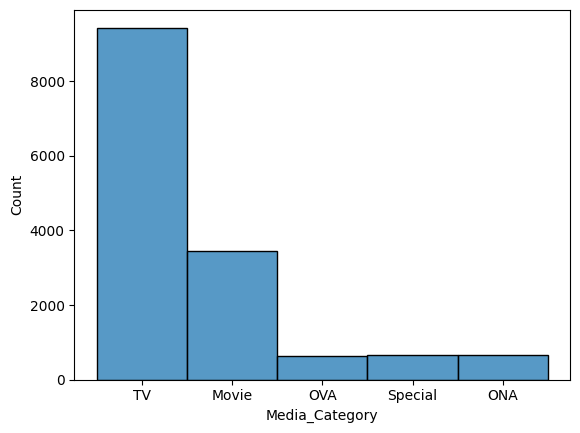

In [ ]:
sns.histplot(anime_dataset['Media_Category'])
plt.show()

Agora vamos explorar a coluna recém criada "Number_Episodes" com o número dos episódios de cada anime:

In [ ]:
anime_dataset['Number_Episodes'].value_counts()

1      3937
12     2336
13     1555
25     1011
26      945
11      897
24      686
2       364
10      336
23      239
4       200
14      168
22      166
39      153
8       150
20      100
15      100
50      100
47      100
6       100
?        98
7        74
51       61
17       50
112      50
40       50
79       50
94       50
62       50
120      50
33       50
43       50
99       50
101      50
37       50
27       50
52       50
500      50
3        50
75       37
16       35
78       31
74       23
201      15
77       14
110      11
148       7
64        1
Name: Number_Episodes, dtype: int64

Com isso descobre-se o valor "?", que nesse caso significa ausência de informação.

In [ ]:
#Investigando à quais animes se referem esses valores
anime_dataset[anime_dataset['Number_Episodes']=="?"]

,Anime_name,Media_Category,duration,members,Score,Number_Episodes
47,Tian Guan Cifu Er,ONA,Oct 2023 -,"30,404 members",8.73,?
96,Tian Guan Cifu Er,ONA,Oct 2023 -,"30,405 members",8.73,?
145,Tian Guan Cifu Er,ONA,Oct 2023 -,"30,405 members",8.73,?
194,Tian Guan Cifu Er,ONA,Oct 2023 -,"30,405 members",8.73,?
243,Tian Guan Cifu Er,ONA,Oct 2023 -,"30,405 members",8.73,?
...,...,...,...,...,...,...
2454,One Piece,TV,Oct 1999 -,"2,275,134 members",8.71,?
2503,One Piece,TV,Oct 1999 -,"2,275,134 members",8.71,?
2552,One Piece,TV,Oct 1999 -,"2,275,134 members",8.71,?
2601,One Piece,TV,Oct 1999 -,"2,275,134 members",8.71,?


In [ ]:
#Verificando qual o nome dos animes que possuem missing values
anime_dataset['Anime_name'][anime_dataset['Number_Episodes']=="?"].unique()

array(['Tian Guan Cifu Er', 'One Piece'], dtype=object)

In [ ]:
#Entendendo a proporção dos valores faltantes
missings = anime_dataset['Number_Episodes'][anime_dataset['Number_Episodes']=="?"].count()
total = anime_dataset['Number_Episodes'].count()
print(f'{missings/total:.2%}')


0.66%


Além de perceber e entender que há valores faltantes nesse dataset, nota-se também que são apenas de dois animes ('Tian Guan Cifu Er' e 'One Piece') e ainda que há redundância de dados, ou seja, dados replicados. Coincidentemente são os dados com número de episódios faltantes. Como consistem em apenas 0.66% do total do dataset, simplesmente eliminá-los do dataset possivelmente não traria impacto significativo no uso futuro.

In [ ]:
#Fazendo uma cópia do dataset antes de eliminar os missing values, para exemplificar
#uma outra possível alternativa de pré-processamento


In [ ]:
anime_dataset['Number_Episodes'] = anime_dataset['Number_Episodes'].replace("?",np.nan)
alt_anime_dataset = anime_dataset.copy()
anime_dataset.isnull().sum()

Anime_name          0
Media_Category      0
duration            0
members             0
Score               0
Number_Episodes    98
dtype: int64

In [ ]:
anime_dataset = anime_dataset.dropna(how='any')
print(anime_dataset.shape)
print(alt_anime_dataset.shape)

(14752, 6)
(14850, 6)


A eliminação dos valores faltantes neste caso faria mais sentido que a substituição do mesmo por valores médios deste atributo, pois é algo bem peculiar e no caso de um dos animes em questão, bem único.

Porém a existência de dados duplicados chamou atenção para possibilidade de mais dados duplicados. Sendo assim, o peso relativo dos dados faltantes poderá mudar e eliminar os valores faltantes poderia deixar de ser uma opção interessante. Vamos verificar se existem mais animes duplicados pelo nome:

In [ ]:
anime_dataset[['Anime_name']].value_counts()

Anime_name                         
Made in Abyss                          50
3-gatsu no Lion                        50
Kobayashi-san Chi no Maid Dragon S     50
Shoujo☆Kageki Revue Starlight Movie    50
Kono Oto Tomare! Part 2                50
                                       ..
Gintama°                                3
Steins;Gate                             2
Shoujo Shuumatsu Ryokou                 2
Bungou Stray Dogs 3rd Season            1
Fullmetal Alchemist: Brotherhood        1
Length: 344, dtype: int64

In [ ]:
#verificando os valores de um anime repetido 3x
anime_dataset[anime_dataset['Anime_name']=='Gintama°']



,Anime_name,Media_Category,duration,members,Score,Number_Episodes
2,Gintama°,TV,Apr 2015 - Mar 2016,"614,907 members",9.06,51
51,Gintama°,TV,Apr 2015 - Mar 2016,"614,907 members",9.06,51
100,Gintama°,TV,Apr 2015 - Mar 2016,"614,907 members",9.06,51


In [ ]:
#verificando os valores de um anime repetido 50x
anime_dataset[anime_dataset['Anime_name']=='Kono Oto Tomare! Part 2']

,Anime_name,Media_Category,duration,members,Score,Number_Episodes
5749,Kono Oto Tomare! Part 2,TV,Oct 2019 - Dec 2019,"171,172 members",8.42,13
5798,Kono Oto Tomare! Part 2,TV,Oct 2019 - Dec 2019,"171,172 members",8.42,13
5847,Kono Oto Tomare! Part 2,TV,Oct 2019 - Dec 2019,"171,172 members",8.42,13
5896,Kono Oto Tomare! Part 2,TV,Oct 2019 - Dec 2019,"171,172 members",8.42,13
5945,Kono Oto Tomare! Part 2,TV,Oct 2019 - Dec 2019,"171,172 members",8.42,13
5994,Kono Oto Tomare! Part 2,TV,Oct 2019 - Dec 2019,"171,172 members",8.42,13
6043,Kono Oto Tomare! Part 2,TV,Oct 2019 - Dec 2019,"171,172 members",8.42,13
6092,Kono Oto Tomare! Part 2,TV,Oct 2019 - Dec 2019,"171,172 members",8.42,13
6141,Kono Oto Tomare! Part 2,TV,Oct 2019 - Dec 2019,"171,172 members",8.42,13
6190,Kono Oto Tomare! Part 2,TV,Oct 2019 - Dec 2019,"171,172 members",8.42,13


Com as observações acima, foi confirmado que temos muitos dados replicados no dataset. Sendo assim, a remoção de dados repetidos se faz fundamental para prosseguirmos com a análise.

Com uma rápida pesquisa foi possível encontrar o total de episódios de ambos animes em plataforma de streaming (https://www.crunchyroll.com/pt-br/). One Piece possui até o momento 1086 episódios e o Tian Guan Cifu Er 18 episódios.

Dessa forma, a modificação alternativa seria inserir o número correto de episódios no lugar do nan e remover dados repetidos:

In [ ]:
#Preenchendo os valores faltantes com as informações obtidas da pesquisa
alt_anime_dataset.loc[249,'Number_Episodes']=1086
alt_anime_dataset.loc[47,'Number_Episodes']=18

#Mantendo apenas o primeiro valor dos dados repetidos
alt_anime_dataset = alt_anime_dataset.drop_duplicates(subset=['Anime_name','Media_Category'],keep='first')
anime_dataset = anime_dataset.drop_duplicates(subset=['Anime_name','Media_Category'],keep='first')

alt_anime_dataset[(alt_anime_dataset['Anime_name']=='One Piece') | (alt_anime_dataset['Anime_name']== 'Tian Guan Cifu Er')]

,Anime_name,Media_Category,duration,members,Score,Number_Episodes
47,Tian Guan Cifu Er,ONA,Oct 2023 -,"30,404 members",8.73,18
249,One Piece,TV,Oct 1999 -,"2,275,134 members",8.71,1086


In [ ]:
#Verificando que de fato a diferença entre o dataset descatando os valores nulos e o dataset preenchendo-os são de apenas 2 linhas.
print(alt_anime_dataset.shape)
print(anime_dataset.shape)

(346, 6)
(344, 6)


In [ ]:
#novo cálculo do peso dos dados faltantes sobre o novo total sem dados replicados
missings = alt_anime_dataset.shape[0] - anime_dataset.shape[0]
total = alt_anime_dataset.shape[0]
print(f'{missings/total:.2%}')

0.58%


Ainda após a remoção das duplicatas, o valor dos animes que apresentavam missing values que seriam o 'Tian Guan Cifu Er' e 'One Piece', representariam apenas 0.58% de todo o dataset. Dessa forma, ainda executar a remoção das linhas contendo valores faltantes não afetaria de modo significativo o dataset.

In [ ]:
#avaliando a redução total do dataset após a remoção de dados repetidos
new_size = 346
raw_size = 14850
print(f'{(new_size-raw_size)/raw_size:.2%}')

-97.67%


Com a remoção dos valores repetidos, curiosamente o tamanho total do dataset foi reduzido em 97.67% do tamanho original, de 14850 linhas para apenas 346 linhas. Seguimos com o dataset alt_anime_dataset que contem os missings substituidos pelos valores obtidos na pesquisa.

Outra modificação necessária será no atributo member, onde devemos limpar a string 'members' dos valores, afim de poder tratar esses dados como dados numéricos.

In [ ]:
#de modo analogo ao que foi feito anteriormente, tomando vantagem do número e da palavra
#estarem separados por espaço simples:
alt_anime_dataset['members'] = alt_anime_dataset['members'].apply(lambda x: x.replace(',','')) #para que o número possa ser compreendido como inteiro, é necessário a remoção dos caracteres ',' usados para separação de milhar nesse caso
alt_anime_dataset['members'] = alt_anime_dataset['members'].apply(lambda x: int(x.split(' ')[0]))

Próxima transformação interessante a ser feita é com o atributo duration, onde é uma coluna que contém informação de quando o anime começou e terminou, sendo do tipo date porém entendida nos dados brutos como 'object'. Assim, é possível a partir dela obter o mês e ano de início do anime e bem como do fim do mesmo.

In [ ]:
#criando duas colunas Start_date e End_date a partir do atributo duration e então removendo o atributo original
# alt_anime_dataset[['Start_date', 'End_date']] = alt_anime_dataset['duration'].str.extract(r'([a-zA-Z]+ \d{4}) - ([a-zA-Z]+ \d{4}|[a-zA-Z]+)?')
alt_anime_dataset['Start_date'] = alt_anime_dataset['duration'].str.extract(r'([a-zA-Z]+ \d{4})')
alt_anime_dataset['End_date'] = alt_anime_dataset['duration'].str.extract(r'([a-zA-Z]+ \d{4})\s*-\s*([a-zA-Z]+ \d{4}|[a-zA-Z]+|$)')[1]
alt_anime_dataset['Start_date'] = pd.to_datetime(alt_anime_dataset['Start_date'], format='%b %Y', errors='coerce')
alt_anime_dataset['End_date'] = pd.to_datetime(alt_anime_dataset['End_date'], format='%b %Y', errors='coerce')
alt_anime_dataset = alt_anime_dataset.drop(columns='duration')


In [ ]:
#Consertando o cálculo do end_date para ambos os animes que estão em produção até hoje.
alt_anime_dataset.loc[249,'End_date']=datetime.now()
alt_anime_dataset.loc[47,'End_date']=datetime.now()

In [ ]:
#Com as colunas Start_date e End_date, é possível obter a duração em meses dos animes:
alt_anime_dataset['Duration_in_days'] = alt_anime_dataset['End_date'] - alt_anime_dataset['Start_date']
alt_anime_dataset['Duration_in_days']

0       456 days
1       153 days
2       335 days
3        91 days
4        61 days
          ...   
14649     0 days
14699     0 days
14749   244 days
14799    61 days
14849    61 days
Name: Duration_in_days, Length: 346, dtype: timedelta64[ns]

Agora o dataset passou por quase todas as transformações necessárias. Vamos verificar os types e fazer as modificações de acordo.

In [ ]:
#Verificando os types
alt_anime_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346 entries, 0 to 14849
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   Anime_name        346 non-null    object         
 1   Media_Category    346 non-null    object         
 2   members           346 non-null    int64          
 3   Score             346 non-null    float64        
 4   Number_Episodes   346 non-null    object         
 5   Start_date        346 non-null    datetime64[ns] 
 6   End_date          343 non-null    datetime64[ns] 
 7   Duration_in_days  343 non-null    timedelta64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(3), timedelta64[ns](1)
memory usage: 32.4+ KB


In [ ]:
#Ajustando os types
alt_anime_dataset['Anime_name']=alt_anime_dataset['Anime_name'].astype('string')
alt_anime_dataset['Media_Category']=alt_anime_dataset['Media_Category'].astype('category')
alt_anime_dataset['Number_Episodes']=alt_anime_dataset['Number_Episodes'].astype('int64')

#Verificando novamente os types
alt_anime_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346 entries, 0 to 14849
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   Anime_name        346 non-null    string         
 1   Media_Category    346 non-null    category       
 2   members           346 non-null    int64          
 3   Score             346 non-null    float64        
 4   Number_Episodes   346 non-null    int64          
 5   Start_date        346 non-null    datetime64[ns] 
 6   End_date          343 non-null    datetime64[ns] 
 7   Duration_in_days  343 non-null    timedelta64[ns]
dtypes: category(1), datetime64[ns](2), float64(1), int64(2), string(1), timedelta64[ns](1)
memory usage: 30.3 KB


# **Análise após pré processamento**

Agora sim nosso dataset pré tratado está pronto para extrairmos algumas estatísticas.

In [ ]:
#Obtendo algumas estatísticas básicas
alt_anime_dataset.describe()

,members,Score,Number_Episodes,Duration_in_days
count,3.460000e+02,346.000000,346.000000,343
mean,6.296173e+05,8.466647,21.332370,169 days 01:42:15.235704008
std,6.707031e+05,0.217266,66.747388,577 days 21:28:20.058095896
min,8.904000e+03,8.210000,1.000000,0 days 00:00:00
25%,1.800665e+05,8.290000,1.000000,0 days 00:00:00
50%,4.018875e+05,8.410000,12.000000,61 days 00:00:00
75%,8.251582e+05,8.600000,24.000000,151 days 12:00:00
max,3.848692e+06,9.090000,1086.000000,8837 days 04:16:32.923033


Dessa vez o describe traz um pouco mais de informações sobre os atributos e agora informações que fazem sentido. Aqui já é possível perceber alguns fatos como o maior número de episódios sendo 1086 e o anime que ficou mais tempo no ar ficou por mais de 8837 dias (até o presente momento, o valor de dias mudará uma vez que o End_date para esta linha é obtido usando datetime.now() que fornece sempre a data e hora do momento da execução do código).

In [ ]:
#Para descobrir que anime é esse, basta filtrar o dataset pelo máximo do atributo Number_Episodes
alt_anime_dataset[alt_anime_dataset['Number_Episodes']==alt_anime_dataset['Number_Episodes'].max()]

,Anime_name,Media_Category,members,Score,Number_Episodes,Start_date,End_date,Duration_in_days
249,One Piece,TV,2275134,8.71,1086,1999-10-01,2023-12-11 04:16:32.923033,8837 days 04:16:32.923033


Ao rodar a linha de código acima, descobrimos que se trata do One Piece, que atualmente conta com 1086 e está em produção desde outrubro de 1999, tornando ele um dos animes mais longevos conhecidos.

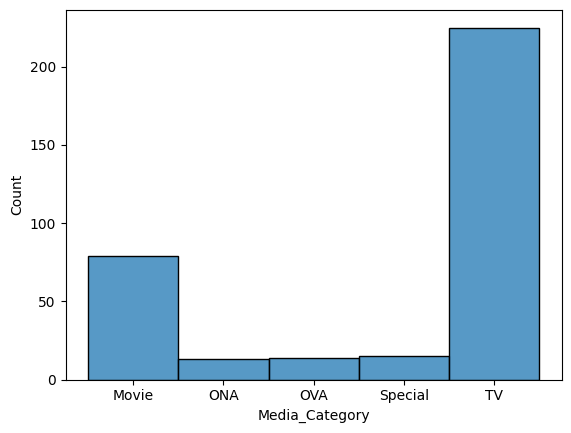

In [ ]:
#Verificando se a distribuição entre as classes, categorias de anime (Media_Category)
#mudou após a limpeza
sns.histplot(alt_anime_dataset['Media_Category'])
plt.show()





É possível perceber que a distribuição se manteve similar a anterior mesmo com a remoção das replicatas. Ou seja, há mais animes do tipo TV, seguido de Movie, Special, OVA e então ONA.

Voltando para o número de episódios, apenas para observarmos este atributo em um outro tipo de visualização, iremos notar que animes com muitos episódios como o One Piece são na verdade outliers.

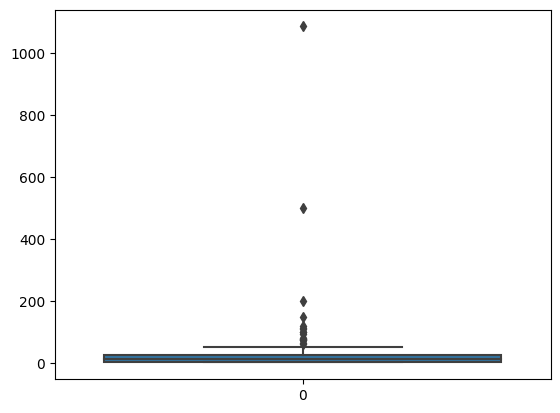

In [ ]:
#Verificando a distribuição dos animes por número de episódios em boxplot
sns.boxplot(data=alt_anime_dataset['Number_Episodes'])
plt.show()

In [ ]:
#Há uma grande discrepância entre os valores e alguns outliers. Vamos tentar descobrir quais são esses animes com mais de 400 episódios e
#plotar o boxplot sem eles
alt_anime_dataset[alt_anime_dataset['Number_Episodes']>400]

,Anime_name,Media_Category,members,Score,Number_Episodes,Start_date,End_date,Duration_in_days
249,One Piece,TV,2275134,8.71,1086,1999-10-01,2023-12-11 04:16:32.923033,8837 days 04:16:32.923033
12149,Naruto: Shippuuden,TV,2420022,8.26,500,2007-02-01,2017-03-01 00:00:00.000000,3681 days 00:00:00


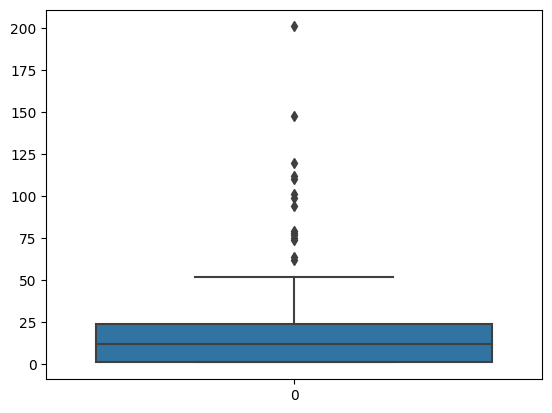

In [ ]:
#plotando o boxplot sem os animes One Piece e Naruto: Shippuuden
sns.boxplot(alt_anime_dataset['Number_Episodes'][alt_anime_dataset['Number_Episodes']<400])
plt.show()

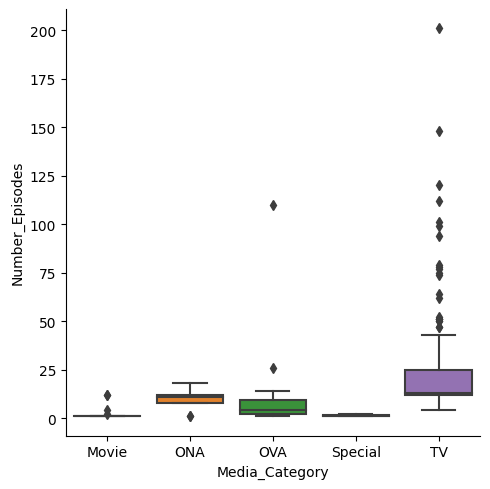

In [ ]:
#Comparando o número de episódios por categoria de anime
sns.catplot(data=alt_anime_dataset[alt_anime_dataset['Number_Episodes']<400], x="Media_Category", y="Number_Episodes", kind="box")
plt.show()

Separando o boxplot por categorias de animes, nota-se que há de fato uma grande quantidade de outliers nos animes da categoria TV, mesmo após a remoção do Naruto: Shippuuden e One Piece.

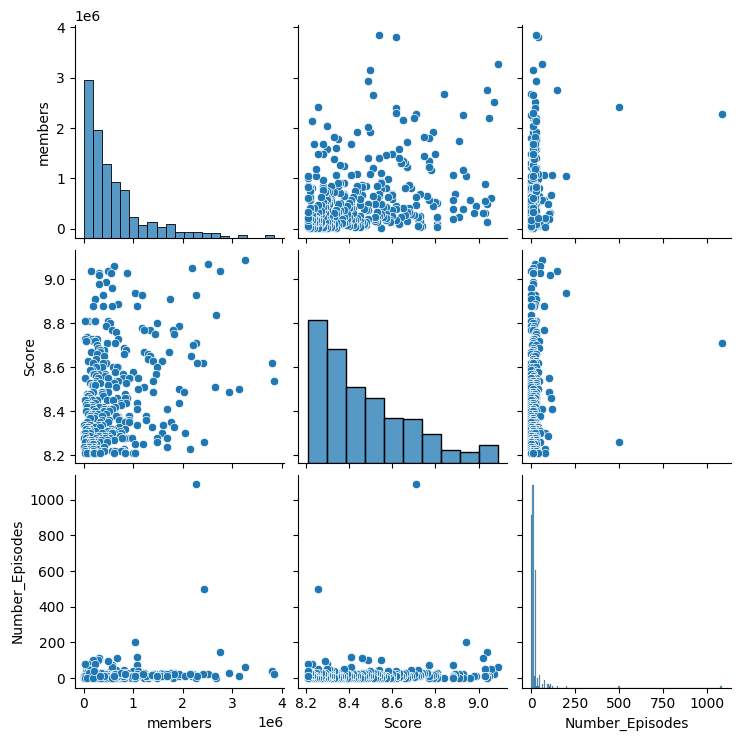

In [ ]:
#Agora, uma nova tentativa de visualizar o pair plot, com mais informações disponíveis que anteriormente
sns.pairplot(alt_anime_dataset)
plt.show()

Com o pairplot é possível ter uma ideia de como estão distribuídos os atributos numéricos, bem como observar a relação de cada um destes pares. Nota-se que os dados não parecem seguir uma distribuição normal pelo perfil assimétrico do histograma e também não parecem muito correlatos dado os gráficos de dispersão.

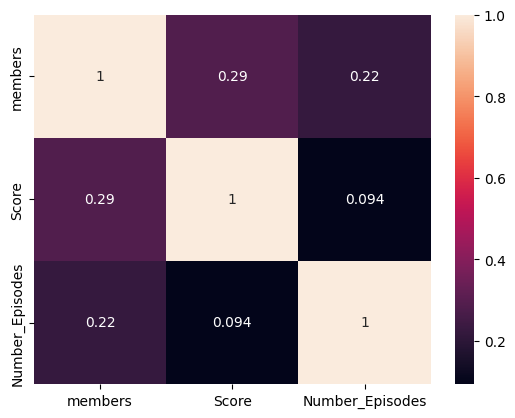

In [ ]:
#Verificando o nível de correlação entre os atributos numéricos
sns.heatmap(alt_anime_dataset.corr(), annot=True)
plt.show()

Já com esse heatmap é possível notar que há uma fraca correlação positiva entre os atributos Score e Members e Number_Episodes e Members. Ainda, verifica-se que não há praticamente nenhuma correlação entre os atributos Score e Number_Episodes.

# **Conclusão**

O dataset escolhido apresentou certas peculiaridades antes não descritas no site de origem, como diversos dados repetidos. A princípio, também não havia dados faltantes, porém ao extrair informações dos episódios, descobriu-se que havia sim informação faltante. Porém isso trouxe modificações necessárias extras e interessantes para tornar o dataset limpo e utilizável.

Foram criados novos atributos, inicialmente tínhamos 5 e após pré-processamento ficamos com um total de 8 atributos.

O atributo "episode" foi renomeado para Media_Category e dele foram extraídos não só a categoria de anime mas também o número total de episódios produzidos.

Do atributo "duration", foram criados os atributos Start_date e End_date, contendo a data de lançamento e encerramento do anime respectivamente. Com esses novos atributos criados, foi possível calcular o delta em dias de quanto tempo durou o anime, com o atributo Duration_in_days.

Por fim, os tipos de dados foram corrigidos e ajustados de acordo para que os gráficos pudessem ser plotados corretamente e ainda que o dataset ao ser utilizado em algum modelo não tenha problemas de interpretação.